# Student Depression Dataset Analysis

### Goal:
Explore patterns of depression among students to uncover meaningful insights and potential contributing factors using structured data analysis.

---

### What You'll See in This Project:
- Data validation, cleaning & wrangling
- Exploratory Data Analysis (EDA)
- Visualizations to support insights
- Correlation exploration

---

### Tools Used:
- Python
- Pandas, NumPy
- Seaborn, Matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings("ignore")

## Loading the Dataset

The dataset was sourced from Kaggle and stored locally.

We will also verify that the dataset has been loaded correctly by checking the first few rows.


In [4]:
# Load the dataset from local path
df = pd.read_csv(r"C:\Users\Ashis\OneDrive\Desktop\Projects\Depression\student_depression_dataset.csv")

# Preview first few rows
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


## Dataset Overview

Check shape, data types, missing values, and basic stats.

In [6]:
# Shape of dataset
print("Shape:", df.shape)

# Column names
print("\nColumns:", df.columns.tolist())

# Data types and nulls
print("\nInfo():")
print(df.info())

# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Descriptive stats
print("\nSummary Stats:\n", df.describe())

Shape: (27901, 18)

Columns: ['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']

Info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float6

## Check Data Quality

We scan all columns for:
- Placeholder values ('?', '', 'NA')
- Formatting issues (quotes, spacing)
- Unexpected or inconsistent values

This helps us prep for cleaning.

In [8]:
# View unique values in all columns to spot formatting or entry issues
for col in df.columns:
    print(f"{col}:")
    print(df[col].unique())
    print("------")


id:
[     2      8     26 ... 140689 140690 140699]
------
Gender:
['Male' 'Female']
------
Age:
[33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
------
City:
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']
------
Profession:
['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
------
Acad

## Clean the Data

Now we clean up the issues found while conducting data quality check:
- Remove extra quotes , "?" and whitespace
- Replace placeholder values with NaN
- Drop any irrelevant columns

In [10]:
# Drop columns we don’t need
df.drop(['id', 'City'], axis=1, inplace=True)

# Clean object columns: remove quotes and extra spaces
df = df.apply(lambda x: x.str.replace("'", "").str.strip() if x.dtype == "object" else x)

# Replace placeholder values with NaN
df.replace(['?', '', 'NA', 'na', 'NaN'], np.nan, inplace=True)

## Convert Types and Encode Values

We convert:
- Numeric strings to proper numbers
- Binary categories to 0 and 1
- Ordinal values (e.g. dietary habits) to ranked scores

In [12]:
# Convert Financial Stress to float
df['Financial Stress'] = df['Financial Stress'].astype(float)

# Binary encoding
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})

# Ordinal encoding for dietary habits
diet_map = {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3}
df['Dietary Habits'] = df['Dietary Habits'].map(diet_map)

In [13]:
print("\nProfession Distribution:\n")
print(df['Profession'].value_counts())


Profession Distribution:

Profession
Student                   27870
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64


## Filter to Students Only

The dataset contains responses from individuals across various professions. However, **over 27,800 out of 27,900+ entries** are from individuals identifying as **students**, making it the dominant group by a large margin.

To maintain analytical consistency and relevance, this analysis focuses exclusively on entries where **Profession = 'Student'**.


In [15]:
# Keep only records where Profession is 'Student'
df_students = df[df['Profession'] == 'Student'].copy()

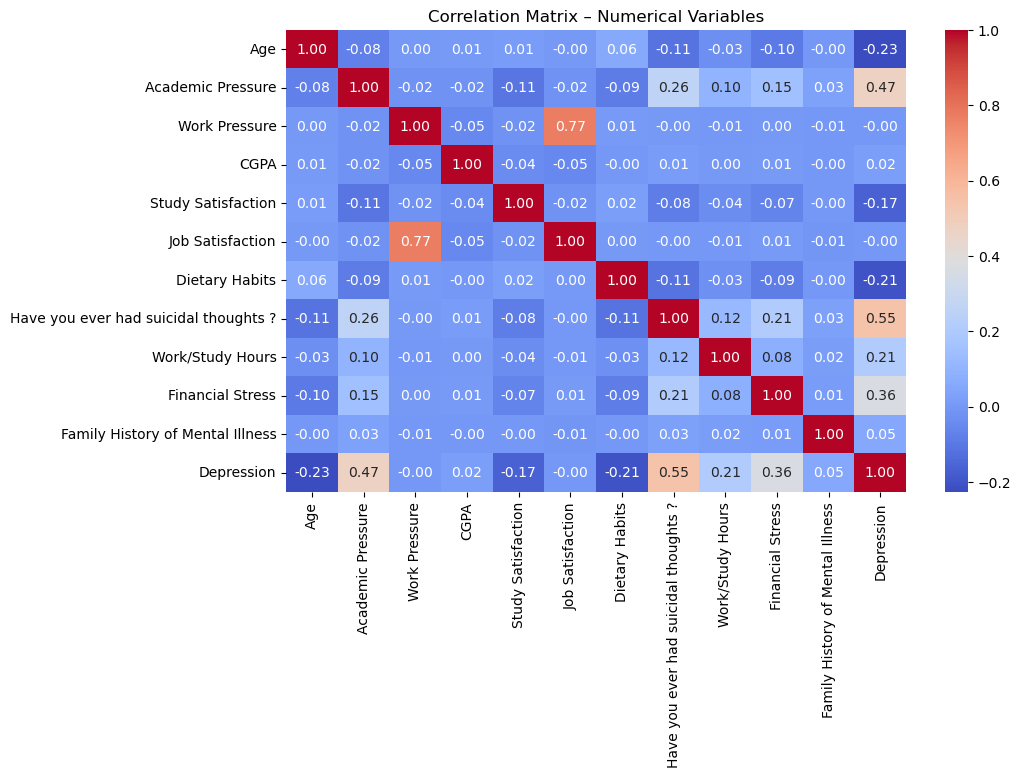

In [16]:
# Correlation Matrix (only numerical columns)

plt.figure(figsize=(10, 6))
sns.heatmap(df_students.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix – Numerical Variables')
plt.show()


## Univariate Analysis: Depression

This is the target variable in our analysis.  
We begin by checking how many students in the dataset reported symptoms of depression.


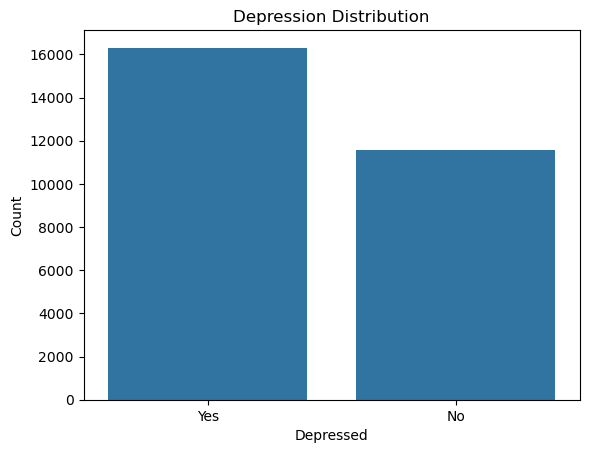

In [18]:
#Depression Distribution

df_students['Depression'] = df_students['Depression'].astype(int).map({0: 'No', 1: 'Yes'})

sns.countplot(x='Depression', data = df_students)
plt.title('Depression Distribution')
plt.xlabel('Depressed')
plt.ylabel('Count')

plt.show()

### Key Finding – Depression Distribution (Students Only)

- A higher number of students reported experiencing depression (~ 16,000+) compared to those who did not (~11,000+).
- This suggests that depression is prevalent among students in this dataset and may require further investigation into contributing factors.

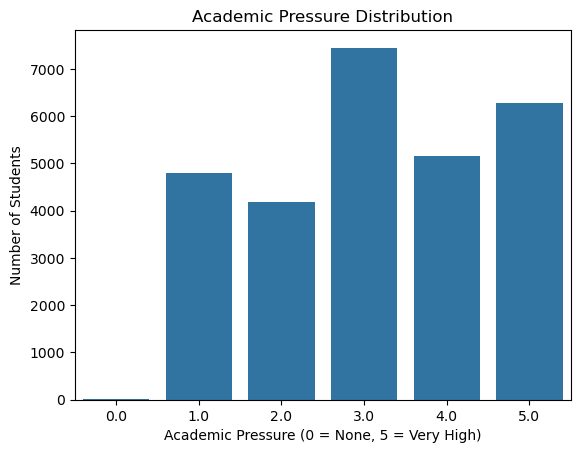

In [20]:
# Academic Pressure Distribution

sns.countplot(x='Academic Pressure', data=df_students)
plt.title('Academic Pressure Distribution')
plt.xlabel('Academic Pressure (0 = None, 5 = Very High)')
plt.ylabel('Number of Students')
plt.show()


### Key Finding – Academic Pressure

- Most students reported academic pressure between levels 3 and 5.
- This suggests academic stress is common and may be a contributing factor to depression.

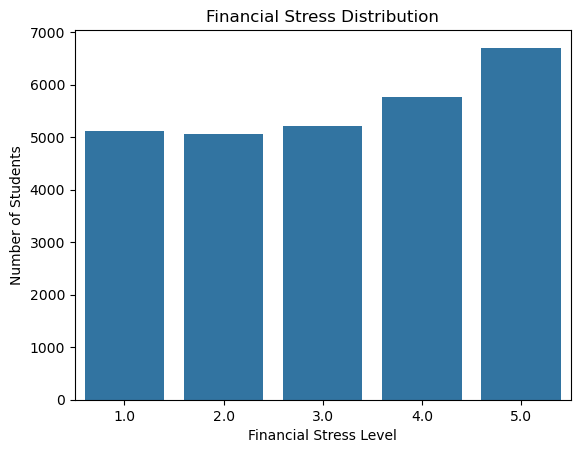

In [22]:
# Financial Stress Distribution

sns.countplot(x='Financial Stress', data=df_students)
plt.title('Financial Stress Distribution')
plt.xlabel('Financial Stress Level')
plt.ylabel('Number of Students')
plt.show()

### Key Finding – Financial Stress

- Level 5 (highest financial stress) was the most common.
- Financial pressure may be a significant stressor for students in this dataset.

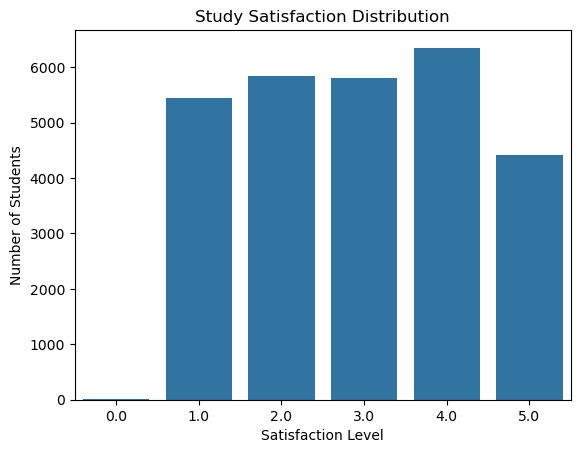

In [24]:
# Study Satisfaction Distribution

sns.countplot(x='Study Satisfaction', data=df_students)
plt.title('Study Satisfaction Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Students')
plt.show()

### Key Finding – Study Satisfaction

- Most students reported satisfaction levels between 2 and 4.
- Very few students reported full satisfaction (level 5).

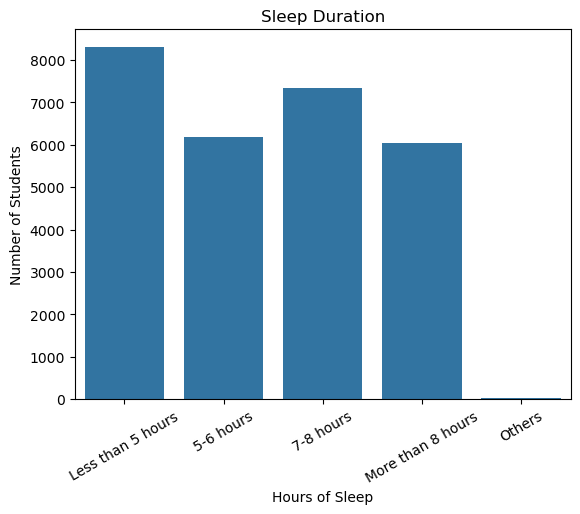

In [26]:
# Sleep Duration Distribution (with custom order)

sleep_order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours', 'Others']

sns.countplot(x='Sleep Duration', data=df_students, order=sleep_order)
plt.title('Sleep Duration')
plt.xlabel('Hours of Sleep')
plt.ylabel('Number of Students')
plt.xticks(rotation=30)
plt.show()

### Key Finding – Sleep Duration

- Most students sleep less than 7 hours a night.
- Reduced sleep could be a symptom or signal of depression.

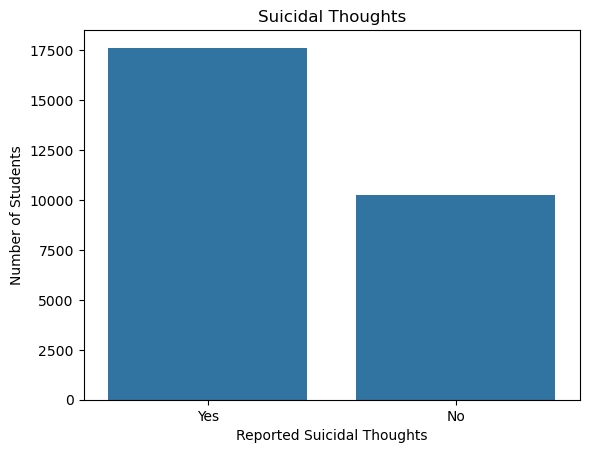

In [28]:
# Suicidal Thoughts Distribution

df_students['Have you ever had suicidal thoughts ?'] = df_students['Have you ever had suicidal thoughts ?'].map({0: 'No', 1: 'Yes'})

sns.countplot(x='Have you ever had suicidal thoughts ?', data=df_students)
plt.title('Suicidal Thoughts')
plt.xlabel('Reported Suicidal Thoughts')
plt.ylabel('Number of Students')
plt.show()


### Key Finding – Suicidal Thoughts

- Over 17,000 students reported having suicidal thoughts.
- This highlights a serious mental health issue among the student population.

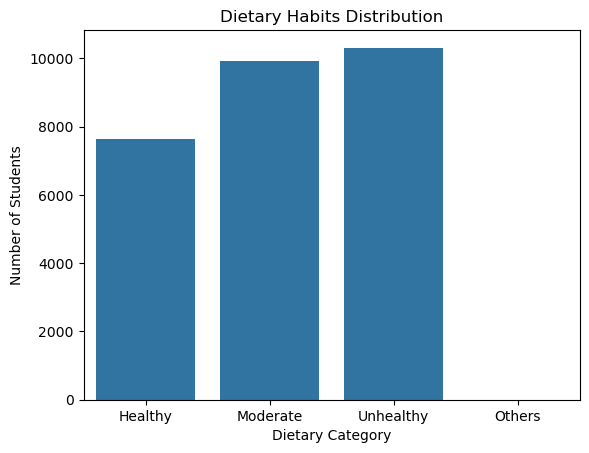

In [30]:
# Map numeric values back to labels for visualization
reverse_diet_map = {
    1: 'Unhealthy',
    2: 'Moderate',
    3: 'Healthy'
}
df_students['Dietary Habits'] = df_students['Dietary Habits'].map(reverse_diet_map)

# Dietary Habits Distribution
sns.countplot(x='Dietary Habits', data=df_students, order=['Healthy', 'Moderate', 'Unhealthy', 'Others'])
plt.title('Dietary Habits Distribution')
plt.xlabel('Dietary Category')
plt.ylabel('Number of Students')
plt.show()

### Key Findings - Dietary Habits Distribution
- Most students report Unhealthy or Moderate eating habits.
- Healthy eaters are the minority, which may be relevant when examining mental health trends.

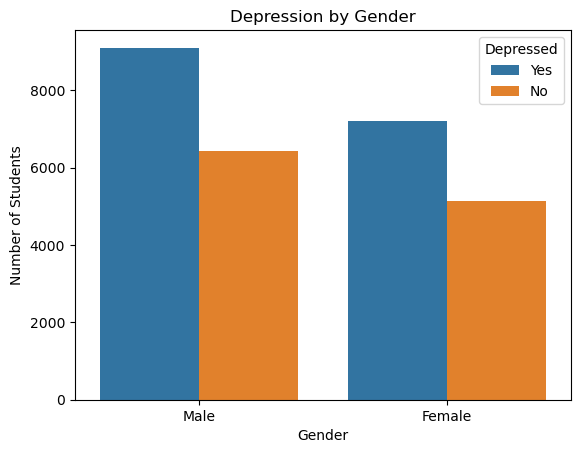

In [32]:
# Depression by Gender

sns.countplot(x='Gender', hue='Depression', data=df_students)
plt.title('Depression by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.legend(title='Depressed')
plt.show()

### Key Finding – Gender and Depression

- Depression was reported more frequently by male students than female students.
- However, both genders show a high number of cases, suggesting it's a widespread issue.

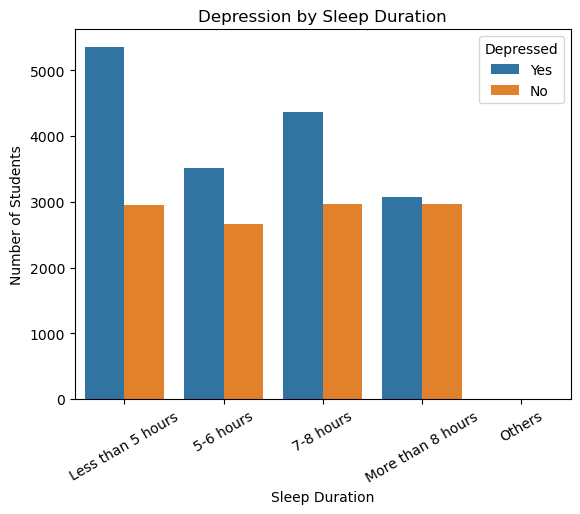

In [34]:
# Sleep Duration vs Depression (with custom order)

sleep_order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours', 'Others']

sns.countplot(x='Sleep Duration', hue='Depression', data=df_students, order=sleep_order)
plt.title('Depression by Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Number of Students')
plt.xticks(rotation=30)
plt.legend(title='Depressed')
plt.show()

### Key Finding – Sleep Duration and Depression

- Students who sleep less than 5 hours report the highest levels of depression.
- Those who sleep 7–8 hours or more show a more balanced distribution.
- Lack of sleep appears strongly associated with depressive symptoms.

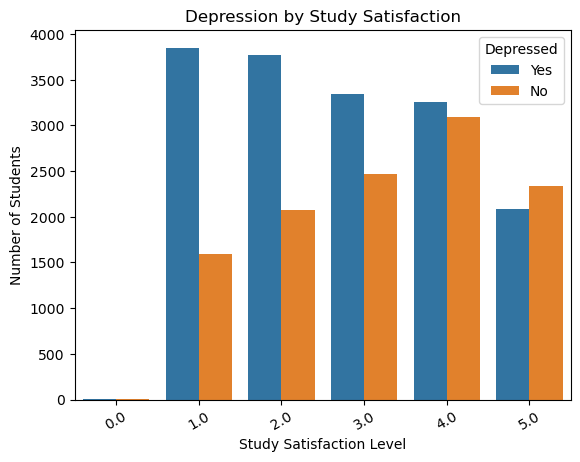

In [36]:
# Depression by Study Satisfaction

sns.countplot(x='Study Satisfaction', hue='Depression', data=df_students,hue_order=['Yes', 'No'])
plt.title('Depression by Study Satisfaction')
plt.xlabel('Study Satisfaction Level')
plt.ylabel('Number of Students')
plt.legend(title='Depressed')
plt.xticks(rotation=30)
plt.show()

### Key Finding – Study Satisfaction and Depression

- Students with low study satisfaction (levels 1–2) show much higher levels of depression.
- As satisfaction increases, depression rates drop noticeably.
- This suggests dissatisfaction with studies may be a significant risk factor for depression.

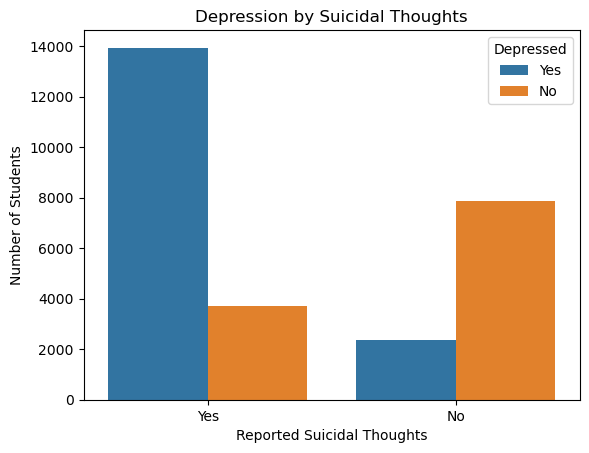

In [38]:
# Depression by Suicidal Thoughts

sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=df_students)
plt.title('Depression by Suicidal Thoughts')
plt.xlabel('Reported Suicidal Thoughts')
plt.ylabel('Number of Students')
plt.legend(title='Depressed')
plt.show()


### Key Finding – Suicidal Thoughts and Depression

- A majority of students who reported suicidal thoughts were also classified as depressed.
- Very few non-depressed students reported having suicidal thoughts.
- This shows a strong link between depression and suicidal ideation.

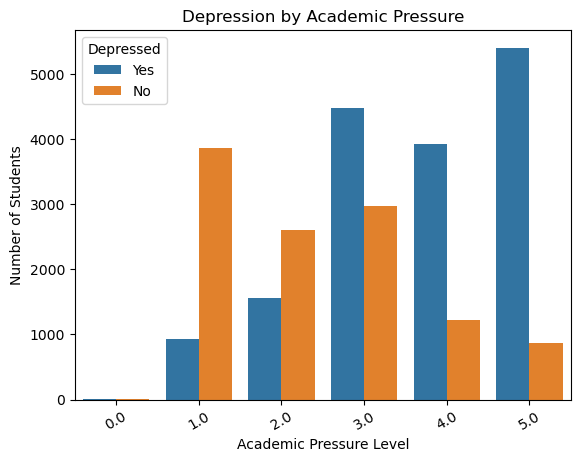

In [40]:
# Depression by Academic Pressure

sns.countplot(x='Academic Pressure', hue='Depression', data=df_students , hue_order=['Yes', 'No'])
plt.title('Depression by Academic Pressure')
plt.xlabel('Academic Pressure Level')
plt.ylabel('Number of Students')
plt.legend(title='Depressed')
plt.xticks(rotation=30)
plt.show()

### Key Finding – Academic Pressure and Depression

- Depression increases sharply with higher academic pressure levels.
- Students experiencing maximum pressure (level 5) show the highest depression rates.
- Academic stress appears to be a major factor influencing student mental health.

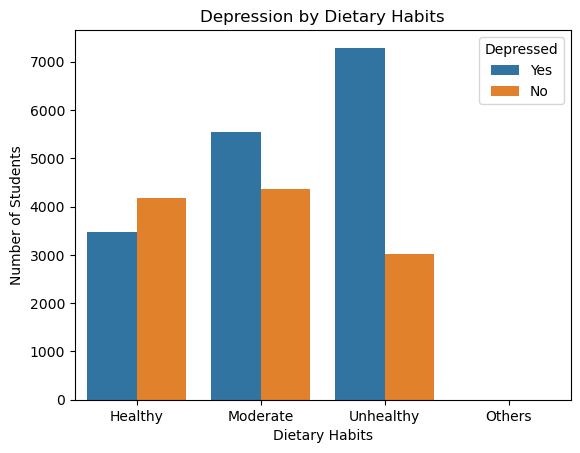

In [42]:
# Depression by Dietary Habits
sns.countplot(x='Dietary Habits', hue='Depression', data=df_students, 
              order=['Healthy', 'Moderate', 'Unhealthy', 'Others'], 
              hue_order=['Yes', 'No'])
plt.title('Depression by Dietary Habits')
plt.xlabel('Dietary Habits')
plt.ylabel('Number of Students')
plt.legend(title='Depressed')
plt.show()

### Key Findings - Depression by Dietary Habits

- Students with **unhealthy** dietary habits reported the highest levels of depression.  
- Those with **healthy** diets had the lowest number of depression cases.  
- This suggests dietary patterns may reflect underlying mental health status.

In [44]:
# Select features for multivariate analysis
features = ['Academic Pressure', 'Study Satisfaction', 'Financial Stress', 'Dietary Habits', 'Depression']

# Prepare data - convert Depression back to binary if necessary
df_students['Depression'] = df_students['Depression'].map({'Yes': 1, 'No': 0})

# Ensure all selected features are numeric for pairplot
df_multi = df_students[features].copy()

# Map Dietary Habits to numeric (if not already done)
diet_map = {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3}
df_multi['Dietary Habits'] = df_multi['Dietary Habits'].map(diet_map)

# Map Depression back to string for plotting (optional)
df_multi['Depression'] = df_multi['Depression'].map({1: 'Yes', 0: 'No'})

# Check prepared data
df_multi.head()


,Academic Pressure,Study Satisfaction,Financial Stress,Dietary Habits,Depression
0,5.0,2.0,1.0,3.0,Yes
1,2.0,5.0,2.0,2.0,No
2,3.0,5.0,1.0,3.0,No
3,3.0,2.0,5.0,2.0,Yes
4,4.0,3.0,1.0,2.0,No


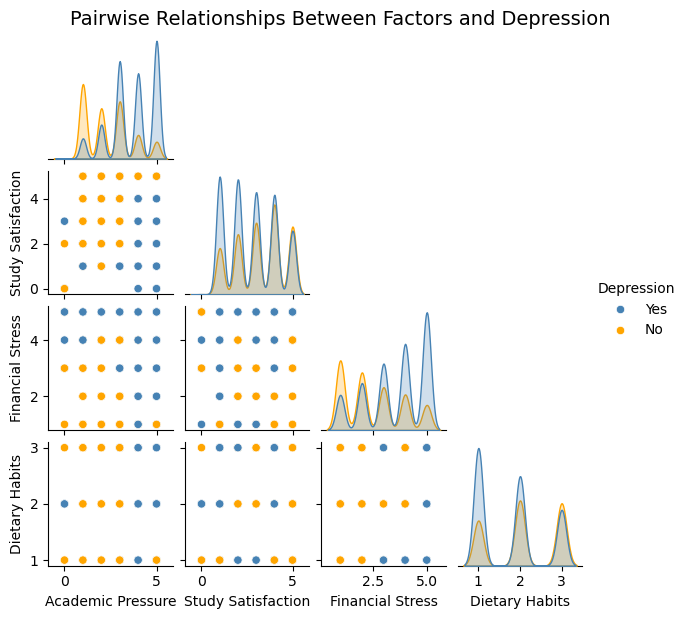

In [75]:
# Pairplot: Visualize interaction across selected features by Depression status
sns.pairplot(df_multi, hue='Depression', diag_kind='kde', corner=True, palette={'Yes': 'steelblue', 'No': 'orange'}, height = 1.5, aspect = 1)
plt.suptitle('Pairwise Relationships Between Factors and Depression', y=1.02, fontsize=14)
plt.show()

### Pairwise Analysis: Depression vs Key Risk Factors

This pairplot shows how multiple risk factors interact with depression in students.

**Key Insight:**
- Students with **high academic pressure**, **low study satisfaction**, **high financial stress**, and **unhealthy dietary habits** are more likely to be depressed.

The patterns reinforce earlier univariate findings and help uncover multivariable risk clusters for depression.


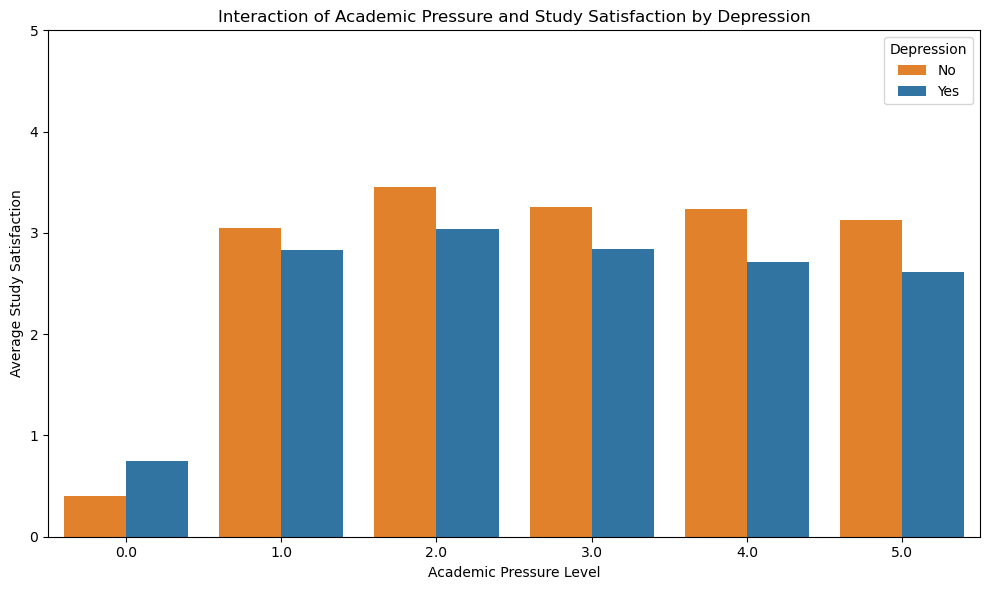

In [47]:
# Map numeric depression values (0 and 1) to 'No' and 'Yes'
df_students['Depression'] = df_students['Depression'].map({0: 'No', 1: 'Yes'})

# Set figure size
plt.figure(figsize=(10, 6))

sns.barplot(
    x='Academic Pressure',
    y='Study Satisfaction',
    hue='Depression',
    data=df_students,
    ci=None,
    palette={'Yes': 'tab:blue', 'No': 'tab:orange'}
)

# Chart styling
plt.title('Interaction of Academic Pressure and Study Satisfaction by Depression')
plt.xlabel('Academic Pressure Level')
plt.ylabel('Average Study Satisfaction')
plt.ylim(0, 5)  # Clamp y-axis to valid range
plt.legend(title='Depression', loc='upper right')
plt.tight_layout()
plt.show()


### Interaction of Academic Pressure and Study Satisfaction by Depression

#### **Key Insights**:
- **Depressed students** exhibit **lower study satisfaction** across all academic pressure levels compared to non-depressed students.
- **Non-depressed students** maintain a relatively stable study satisfaction, even at higher levels of academic pressure.
- **Higher academic pressure** leads to a **significant decrease in study satisfaction for depressed students**, especially at levels 4 and 5.


## Final Summary and Conclusion

### Key Findings:
- **Academic Pressure** and **Financial Stress** were identified as significant contributors to depression in students.
- **Study Satisfaction** had a negative correlation with depression, indicating that low satisfaction is a potential risk factor.
- **Dietary Habits** and **Suicidal Thoughts** were also strongly associated with depression, with **unhealthy diets** and **suicidal thoughts** being more prevalent in the depressed group.

### Insights:
- Students with **high academic pressure** and **financial stress** are at a higher risk of depression, suggesting the need for interventions focused on stress management.
- **Improving study satisfaction** and promoting **healthier dietary habits** could potentially reduce the prevalence of depression among students.

### Recommendations:
- **Targeted mental health programs** for students experiencing high academic pressure and financial stress.
- **Workshops or counseling** on **study satisfaction** to help improve emotional well-being.
- **Awareness campaigns** to encourage healthier eating habits and the importance of seeking help for suicidal thoughts.
